<h2><center>Applied Machine Learning - Assignment 4</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Question 1 - Data Preprocessing</h3>
<ul>
    <li>Bank Marketing: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing</li>
    <li>Occupancy Detection: https://archive.ics.uci.edu/dataset/357/occupancy+detection</li>
</ul>
<p>You are required to pre-process given datasets as follows:</p>
<ol>
    <li>Convert any non-numeric values to numeric values. For example, you can replace a country name with an integer value or use one-hot encoding. (Hint: use hashmap (dict) or
pandas.get dummies). Please explain your solution.</li>
    <li>If required, drop rows with missing values or NA. In the next lectures, we will handle
sparse data, allowing us to use records with missing values.</li>
    <li> Split the data into a train (80%) and test (20%) set.</li>
</ol>

<h4>Bank Marketing dataset</h4>

In [2]:
bank_df = pd.read_csv('res/bank-additional-full.csv', delimiter = ';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<p>First, we will replace the values of the binary columns (yes/no) to numeric values.  Following that, we’ll apply one-hot encoding to transform categorical data into binary variables, allowing us to handle non-numeric data in a structured format. Setting drop_first=True eliminates one category per feature to avoid redundancy and prevent multicollinearity, where one category could be inferred from the others.</p>

In [3]:
binary_columns = ['default', 'housing', 'loan', 'y']
for c in binary_columns:
    bank_df[c] = bank_df[c].map({'no': 0.0 , 'yes': 1.0})

category_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome', 'campaign']
bank_df = pd.get_dummies(bank_df, columns = category_columns, drop_first = True).astype(float)

bank_df.head()

,age,default,housing,loan,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56
0,56.0,0.0,0.0,0.0,261.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,NaN,0.0,0.0,149.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,0.0,1.0,0.0,226.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,0.0,0.0,0.0,151.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,1.0,307.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Finally, we will drop any rows containing missing values to ensure a complete dataset</p>

In [4]:
bank_df = bank_df.dropna(axis = 1)
bank_df.head()

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56
0,56.0,261.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,149.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,226.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,151.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,307.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h4>Occupancy Detection dataset</h4>

In [5]:
od_df = pd.read_csv('res/datatraining.txt')
od_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<p>Since all data is in the same year, we can remove the date column. However, we keep the information on the days, hours and minutes as they are crucial for our analysis. The seconds in the timestamps have a value of either 0 or 59. To ensure that we have complete minutes, we round up the time when the seconds value is 59. This allows us to capture measurements at every hour and every “full” minute. Using sine and cosine functions for the hours and minutes allows us to transform cyclic time information into a format that is more suitable for machine learning.</p>

In [6]:
od_df['date'] = pd.to_datetime(od_df['date']).apply(
    lambda x: x + pd.Timedelta(minutes = 1) if x.second == 59 else x
)

od_df['day'] = od_df['date'].dt.day_name()
od_df = pd.get_dummies(od_df, columns = ['day'], drop_first = True)

od_df['sin_hour'] = np.sin(2 * np.pi * od_df['date'].dt.hour / 24)
od_df['cos_hour'] = np.cos(2 * np.pi * od_df['date'].dt.hour / 24)
od_df['sin_minute'] = np.sin(2 * np.pi * od_df['date'].dt.minute / 60)
od_df['cos_minute'] = np.cos(2 * np.pi * od_df['date'].dt.minute / 60)

od_df.drop(columns = ['date'], inplace = True)
od_df = od_df.astype(float)

od_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,sin_hour,cos_hour,sin_minute,cos_minute
1,23.18,27.2720,426.0,721.25,0.004793,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.965926,-0.258819,-0.809017,0.587785
2,23.15,27.2675,429.5,714.00,0.004783,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.965926,-0.258819,-0.743145,0.669131
3,23.15,27.2450,426.0,713.50,0.004779,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.965926,-0.258819,-0.669131,0.743145
4,23.15,27.2000,426.0,708.25,0.004772,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.965926,-0.258819,-0.587785,0.809017
5,23.10,27.2000,426.0,704.50,0.004757,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.965926,-0.258819,-0.500000,0.866025


<p>Since the dataset description indicates that there are no missing values, no further action is required regarding data imputation or handling missing data.</p>

<h4>Task 1.3 - Data Splitting</h4>
<p>Split the data into a train (80%) and test (20%) set.</p>
<h4>Solution</h4>
<p>Since we are not permitted to use any machine learning libraries to split our data, we will manually perform this task as we did in the second and third assignment.</p>

In [7]:
# Bank Marketing
bank_df = bank_df.sample(frac = 1)

# Occupancy Detection
od_df = od_df.sample(frac = 1)

<p>Based on the description of the Bank Marketing dataset, our objective is to predict if the client will subscribe a term deposit.</p>
<p>Based on the description of the Occupancy Detection dataset, our objective is to predict room occupancy.</p>

In [8]:
YBank = bank_df['y']
XBank = bank_df.drop('y', axis = 1)

YOD = od_df['Occupancy']
XOD = od_df.drop('Occupancy', axis = 1)

In [9]:
def normalize(x, epsilon = 1e-10):
    return (x - np.min(x, axis = 0)) / (np.max(x, axis = 0) - np.min(x, axis = 0) + epsilon)

In [10]:
# Bank Marketing
partition_bank = round(len(bank_df) * 0.8)
XTrainBank, YTrainBank =  normalize(XBank[:partition_bank].to_numpy()), YBank[:partition_bank].to_numpy()
XTestBank, YTestBank =  normalize(XBank[partition_bank:].to_numpy()), YBank[partition_bank:].to_numpy()

# Occupancy Detection
partition_od = round(len(od_df) * 0.8)
XTrainOD, YTrainOD =  normalize(XOD[:partition_od].to_numpy()), YOD[:partition_od].to_numpy()
XTestOD, YTestOD =  normalize(XOD[partition_od:].to_numpy()), YOD[partition_od:].to_numpy()

<h3>Question 2 & 3 - Linear Classification with Gradient Descent</h3>
<p>Given the complexity of this task and the numerous intermediate steps involved, I chose to encapsulate the entire model within a single class. This structure enables clear organization and modularity. I will now outline and number each key intermediate step, allowing for easy identification and reference within the code.</p>

<h5>(1) Sigmoid Function</h5>
<p> The linear regression model is given as $\hat{y}_n = \sigma(\beta^T x_n)$
$$\sigma(z) = \frac{1}{1+e^{-z}}$$where $\sigma$ is a logistic function and $z = \beta^T x_n$</p>
<br>
<h5>(2) Logistic Regression Objective Function for SGD</h5>
<p>For SGD we will use the following objective function: $f(\theta; x_i; y_i) := -y_i \log(\sigma(\theta^Tx_i)) - (1 - y_i) \log(1 - \sigma(\theta^T x_i))$</p>
<br>
<h5>(3) Logistic Regression Gradient of the Objective Function for SGD</h5>
<p>
Let $\hat{y}_i = \sigma(\theta^Tx_i)$ <br>
Now we can rewrite the loss function as:
$$f(\theta; x_i; y_i) := -y_i \log(\hat{y}_i) - (1 - y_i) \log(1 - \hat{y}_i)$$
We will use the chain rule to calculate the gradient:
$$\frac{\partial f}{\partial \theta} = \frac{\partial f}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z} \frac{\partial z}{\partial \theta}$$
Step 1. Let's calculate $\frac{\partial f}{\partial \hat{y}_i}$ <br>
We will take the derivative of the loss function $f(\theta; x_i; y_i) := -y_i \log(\hat{y}_i) - (1 - y_i) \log(1 - \hat{y}_i)$ with respect to $\hat{y}_i$:
We get: <br>
$$\frac{\partial f}{\partial \hat{y}_i} = \frac{y_i}{\hat{y}_i} + \frac{1-y_i}{1-\hat{y}_i}$$
Step 2. Now we calculate $\frac{\partial \hat{y}_i}{\partial z}$ <br>
Recall that $\hat{y}_i = \sigma(z)$, where $\sigma(z) = \frac{1}{1+e^{-z}}$ <br>
$$\frac{\partial \hat{y}_i}{\partial z} = \frac{e^{-z}}{(1 + e^{-z})^2} = \sigma(z)(1 - \sigma(z)) = \hat{y} (1 - \hat{y})$$
Step 3. Finally, we calculate $\frac{\partial z}{\partial \theta}$ <br>
Since $z = \theta^Tx_i$ the derivative of $z$ with respect to $\theta$ is: <br>
$$\frac{\partial z}{\partial \theta} = x_i$$
Now, we can put everything together (remember, $\hat{y}_i = \sigma(\theta^T x_i)$: <br>
$$\frac{\partial f}{\partial \theta} = \frac{\partial f}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z} \frac{\partial z}{\partial \theta} = \frac{y_i}{\hat{y}_i} + \frac{1-y_i}{1-\hat{y}_i} \hat{y} (1 - \hat{y}) x_i = ... = (y - \hat{y})x_i$$
</p>
<h5>(4) Logistic Regression using SGD & (5) SGD</h5>
<p>I implemented this function based on the provided pseudocode.</p>
<br>
<h5>(6) Bold Driver step length & (7) AdaGrad step length</h5>
<p>I used the following bold driver steplength implementation -> https://www.ismll.uni-hildesheim.de/lehre/opt-16w/script/mot-03_sgd.pdf</p>

In [11]:
class LinearClassification:
    def __init__(self, XTrain, YTrain, XTest, YTest, step_length, t_max = 1000, epsilon = 1e-5):
        self.XTrain = XTrain
        self.YTrain = YTrain
        self.XTest = XTest
        self.YTest = YTest
        
        self.step_length = step_length
        self.t_max = t_max
        self.epsilon = epsilon

        self.delta_f = []
        self.test_log_loss = []

    # (1)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # (2)
    def logistic_loss(self, theta, x_i, y_i):
        z = x_i @ theta
        return - y_i * np.log(self.sigmoid(z)) - (1 - y_i) * np.log(1 - self.sigmoid(z))
    
    # (3)
    def logistic_gradient(self, theta, x_i, y_i):
        z = x_i @ theta
        sg = self.sigmoid(z)
        return (sg - y_i) * x_i

    # (4)
    def logistic_regression_SGD(self):
        data = list(zip(self.XTrain, self.YTrain))
        theta_init = np.zeros(self.XTrain.shape[1])
        theta_optimized = self.SGD(theta_init, data)
        return theta_optimized

    # (5)
    def SGD(self, theta_init, data):
        theta = theta_init
        h = np.zeros_like(theta_init)
        previous_loss = None

        eta = 0.01 # default
        
        for i in range(self.t_max):
            np.random.shuffle(data)
            total_loss = 0
            
            for x_i, y_i in data:
                gradient = self.logistic_gradient(theta, x_i, y_i)
    
                if self.step_length[0] == 'bold_driver':
                    eta = self.bold_driver_steplength(theta, x_i, y_i, gradient, eta)
                elif self.step_length[0] == 'ada_grad':
                    eta, h = self.ada_grad_steplength(gradient, h, eta) 
                
                theta -= gradient * eta

                # Delta f
                total_loss += self.logistic_loss(theta, x_i, y_i)

            # Test LogLoss
            test_loss = self.calc_log_loss(theta)
            self.test_log_loss.append(test_loss)

            # Delta f
            previous_loss = self.calc_delta_f(data, total_loss, previous_loss)
            
            if np.linalg.norm(gradient * eta) < self.epsilon:
                return theta

        # print(f'\033[91mNot converged in {self.t_max} epochs.\033[0m')

    # (6)
    def bold_driver_steplength(self, theta, x_i, y_i, gradient, eta):
        '''
        Argument Tuple: step_length = ('bold_driver', eta+, eta-)
        - "bold_driver": specifies the Bold Driver step length strategy
        - "eta+": factor to increase the step length
        - "eta-": factor to decrease the step length
        '''
        current_loss = self.logistic_loss(theta, x_i, y_i)
        new_loss = self.logistic_loss(theta - gradient * eta, x_i, y_i)
        if new_loss < current_loss:
            return eta * self.step_length[1]
        else:
            return eta * self.step_length[2]

    # (7)
    def ada_grad_steplength(self, gradient, h, eta):
        '''
        Argument: step_length = 'ada_grad'
        - "ada_grad": specifies the AdaGrad step length strategy
        '''
        h += gradient ** 2
        step_sizes = eta / (np.sqrt(h))
        return step_sizes, h

    def calc_delta_f(self, data, total_loss, previous_loss):
        current_loss = total_loss / len(data)
        if previous_loss is not None:
            delta_f = np.abs(previous_loss - current_loss)
            self.delta_f.append(delta_f)
        return current_loss

    def calc_log_loss(self, theta):
        data_test = list(zip(self.XTest, self.YTest))
        total_loss = 0
        for x_i, y_i in data_test:
            total_loss += self.logistic_loss(theta, x_i, y_i)
        return total_loss / len(data_test)

<h4>Function for Testing and Plotting</h4>

In [12]:
def plot(XTrain, YTrain, XTest, YTest, step_length, epsilon):
    model = LinearClassification(XTrain, YTrain, XTest, YTest, step_length, epsilon = epsilon)
    theta = model.logistic_regression_SGD()

    plt.figure(figsize = (10,5))

    # Plot for Delta f
    plt.subplot(1, 2, 1)
    plt.plot(range(len(model.delta_f)), model.delta_f, color = 'blue', marker = 'o')
    plt.xlabel('Iteration')
    plt.ylabel('Delta f')
    plt.title('Change in Loss Function over Iterations')
    plt.grid(True, which = 'both', linestyle = '--')

    # Plot for LogLoss change of test set
    plt.subplot(1, 2, 2)
    plt.plot(range(len(model.test_log_loss)), model.test_log_loss, color = 'orange', marker = 'o')
    plt.xlabel('Iteration')
    plt.ylabel('Change in LogLoss')
    plt.title('Change in LogLoss (Test Data) Over Iterations')
    plt.grid(True, which = 'both', linestyle = '--')

    plt.tight_layout()
    plt.show()

<h3>RESULTS:</h3>

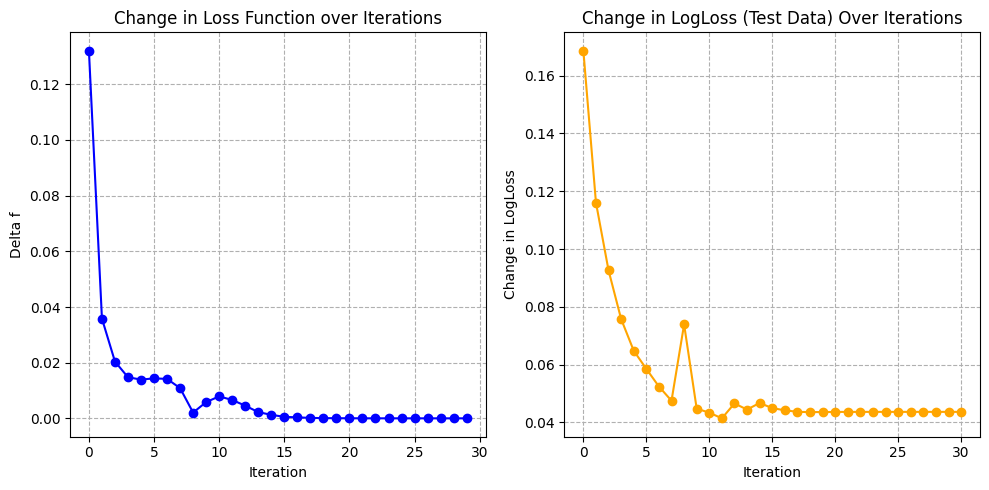

In [13]:
plot(XTrainOD, YTrainOD, XTestOD, YTestOD, step_length = ('bold_driver', 1.0001, 0.999), epsilon = 1e-10)

<p>
During testing, I observed that the Bold Driver step length calculation performed exceptionally well for this training set, with convergence typically achieved within the first epoch. The Bold Driver method adjusts the step length dynamically based on the comparison of the current loss and the loss after applying a gradient update. If the new loss is smaller, the step length is increased, otherwise, it is reduced, allowing for a more responsive and efficient convergence process. To enhance the presentation of results, I set $\alpha_+$ close to 1 from the right (1.0001) and $\alpha_-$ close to 1 from the left (0.999). I also set a strict convergence criterion, $\epsilon = 10^{-10}$, to demonstrate the precision achievable in training the model and the speed of convergence. As illustrated in the loss function graph over iterations, the model converges to near-zero loss in only a few epochs. This approach also yields favorable results for the log loss on the training data, with the graph showing a consistent and steady decrease in loss across iterations, highlighting the effectiveness of the Bold Driver method in achieving both precision and efficiency.
</p>

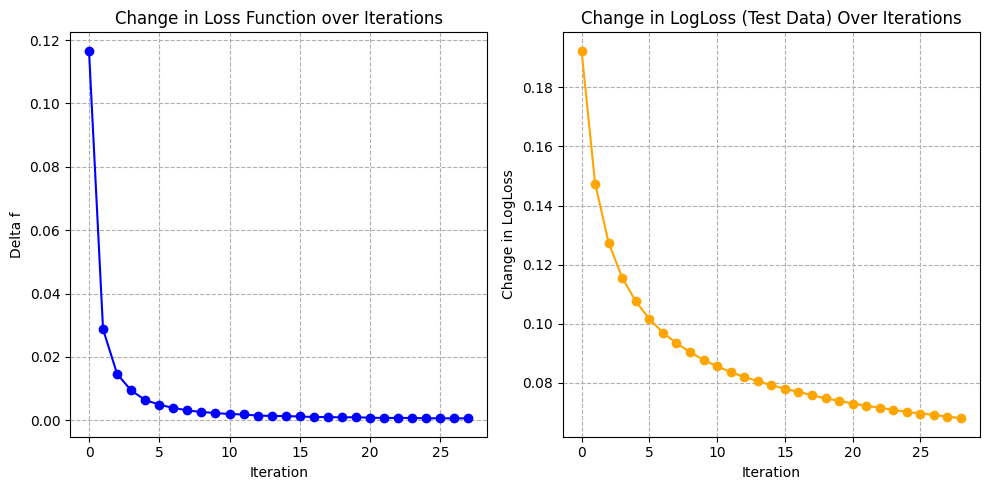

In [14]:
plot(XTrainOD, YTrainOD, XTestOD, YTestOD, step_length = 'ada_grad', epsilon = 1e-6)

<p>
For this training set, the AdaGrad step length calculation also performs well.  AdaGrad adjusts the learning rate for each parameter based on the historical squared gradients, ensuring that larger gradients lead to smaller updates and allowing the algorithm to converge more steadily. AdaGrad generally requires more epochs to converge compared to other methods, it does so with greater consistency, as evidenced by the smooth loss function graph with minimal fluctuations. This behavior is also reflected in the log loss, which shows a steady decrease over the training data. 
</p> 

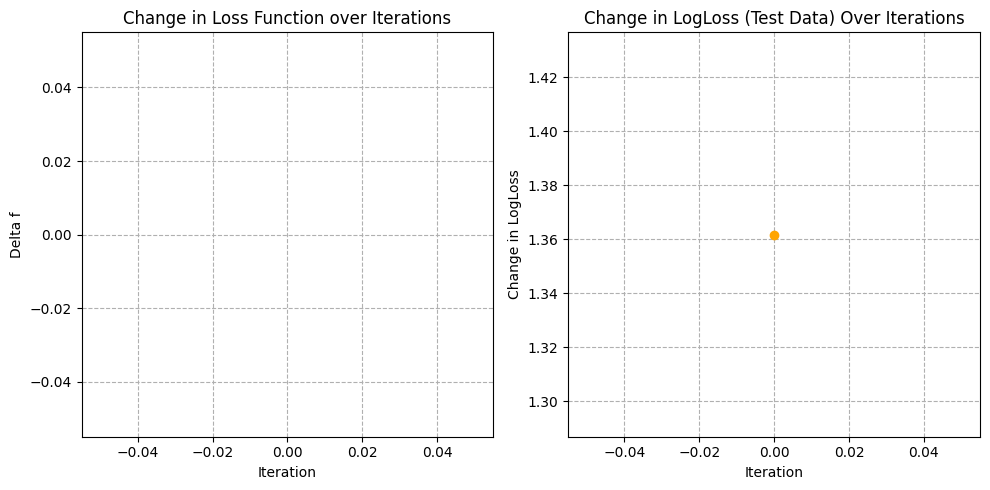

In [15]:
plot(XTrainBank, YTrainBank, XTestBank, YTestBank, step_length = ('bold_driver', 1.1, 0.5), epsilon = 1e-6)

<p>For the bank dataset, I was unable to find suitable values for $\alpha_+$ and $\alpha_-$ that would yield presentable graphs, as the algorithm consistently converges after just one epoch.</p>

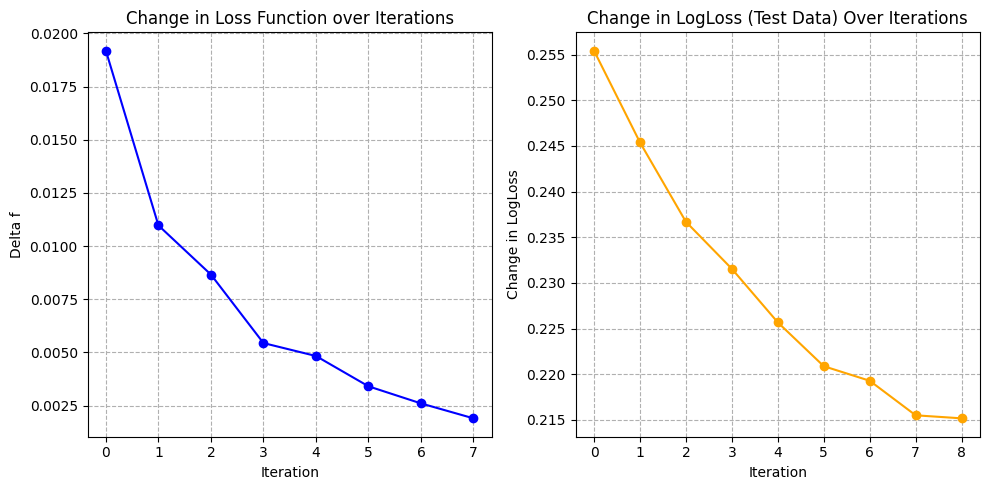

In [16]:
plot(XTrainBank, YTrainBank, XTestBank, YTestBank, step_length = 'ada_grad', epsilon = 1e-3)

<p>
Compared to the Bold Driver step length calculation method, the AdaGrad method took significantly longer to converge during testing, even though I set $\epsilon = 10^{-4}$. This delay can be attributed to the adaptive nature of AdaGrad, where the learning rate shrinks over time due to the accumulation of squared gradients. The change in the loss function follows the expected pattern: as the algorithm nears convergence, the adjustments to the model become increasingly small. The log loss on the test data shows a similar trend but with more fluctuations.  
</p>